#EECS 504 PS1: Filtering

Please provide the following information 
(e.g. Andrew Owens, ahowens):
Aaditi Saoji, avsaoji




# Introduction

We'll provide you with starter code, like this, in a Jupyter notebook for most problem sets. Please fill in the code to complete the assignment, and submit your notebook to Canvas as a .ipynb file. You can, of course, initially write your code offline in an editor like Emacs or Vim -- we'd just like the final output to be in a notebook format to make grading more consistent. You can also host your notebook locally.

Please note that *we won't run your code*. The notebook you submit should already contain all of the results we ask for. In particular, the visualizations of edge responses and blurred images should be computed *before you submit*.  Also, please do not include long, unnecessary outputs (a few print statements and visualizations are fine, but pages of debugging messages make grading difficult).

If you'd like to preview what your notebook will look like when we grade it, follow the directions [here](https://stackoverflow.com/questions/15998491/how-to-convert-ipython-notebooks-to-pdf-and-html) for converting the .ipynb notebook into an HTML file. We'll be running a command similar to: 
```
ipython nbconvert --to html ps1.ipynb  
```




# First steps

Run the following code to import the modules that you'll need, and to download the images. You are welcome to modify this code (e.g. by importing more modules).

In [0]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images
import math

# Download the images that you'll need
base_url = 'https://web.eecs.umich.edu/~ahowens/eecs504/w20/psets/ps1/ims'
for name in ['dog-1.jpg', 'dog-2.jpg', 'apple.jpg']:
  with open(name, 'wb') as out:
    url = os.path.join(base_url, name)
    out.write(urllib.request.urlopen(url).read())



# Problem 1.2: Pet edge detection (a)

(267, 402) (265, 400)
(267, 402) (265, 400)


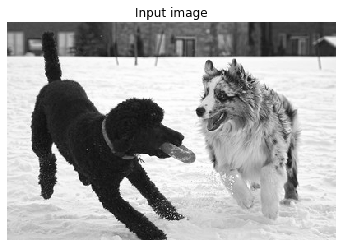

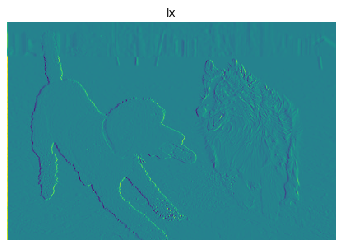

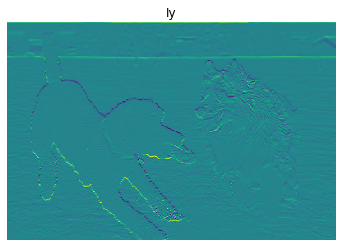

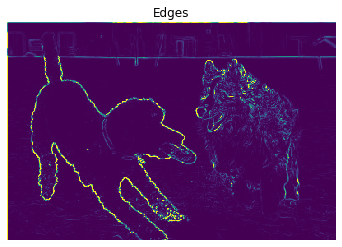

In [2]:
# You can upload images yourself or load them from URLs
im = imageio.imread('dog-1.jpg')
# Convert to grayscale. We'll use floats in [0, 1].
im = im.mean(2)/255.

def convolve(im1,h):
  im2 = np.pad(im1, (1,1), 'constant', constant_values = (0,0))
  print(im2.shape, im1.shape)
  a,b = im1.shape
  c,d = h.shape
  B = np.zeros((a,b))
  for m in range (a):
    for n in range (b):
      for k in range (c):
        for l in range(d):
          B[m][n] = B[m][n] + im2[m-k+1][n-l+1] * h[k][l];
  return B
      
A = np.array([1,-1]);
dx = A.reshape(1,-1)
dy = A.reshape(-1,1);
# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix)

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy)

plt.figure()
plt.title('Edges')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))


# Problem 1.2: Pet edge detection (c)

Please visualize the images and edges with matplotlib, using code similar to what we provided in (a).

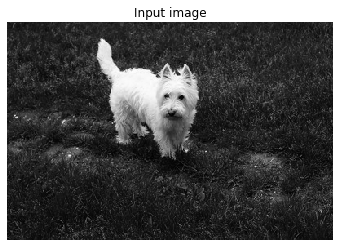

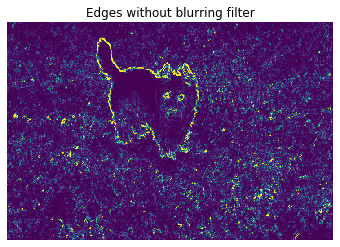

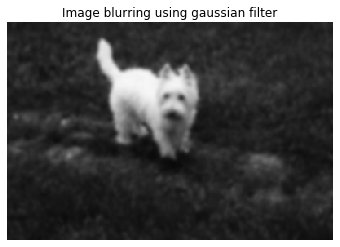

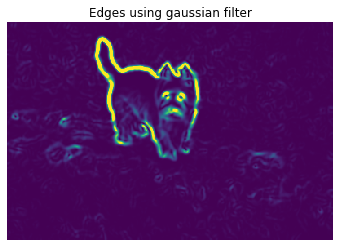

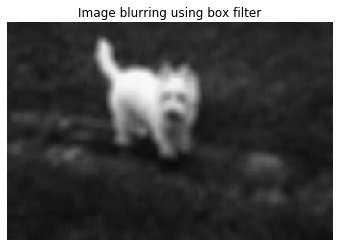

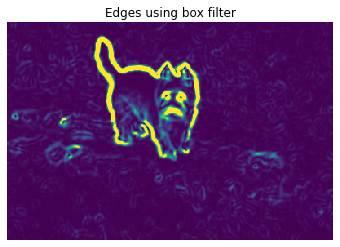

In [3]:
im = imageio.imread('dog-2.jpg').mean(2)/255.

# Your code here!
# 1.2.c.i

Ix = scipy.ndimage.convolve(im, dx)
Iy = scipy.ndimage.convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.title('Edges without blurring filter')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))

# 1.2.c.ii : Gaussian Filter
sigma = 2
gauss_filter = np.zeros((11,11))
x = -5
for i in range(11):
  y = -5
  for j in range(11):
    gauss_filter[i,j] = (1/(2*math.pi*sigma*sigma)) * np.exp(-1*(x*x + y*y)/(2*sigma*sigma))
    y = y + 1
  x = x + 1

Ix = scipy.ndimage.convolve(im, gauss_filter)

Ix1 = scipy.ndimage.convolve(Ix, dx)
Iy1 = scipy.ndimage.convolve(Ix, dy)
edges1 = Ix1**2. + Iy1**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Image blurring using gaussian filter')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(Ix, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.title('Edges using gaussian filter')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges1, vmin = 0., vmax = np.percentile(edges1, 99))

# 1.2.c.iii : Box Filter
box_filter = (1/121) * np.ones((11,11))
Ix = scipy.ndimage.convolve(im, box_filter)

Ix1 = scipy.ndimage.convolve(Ix, dx)
Iy1 = scipy.ndimage.convolve(Ix, dy)
edges2 = Ix1**2. + Iy1**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Image blurring using box filter')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(Ix, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.title('Edges using box filter')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges1, vmin = 0., vmax = np.percentile(edges2, 99))




# Problem 1.2: Pet edge detection (d)

Please use the visualization code to display the filter you construct.

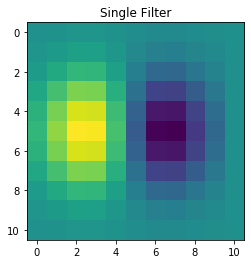

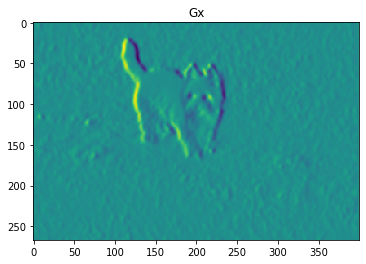

In [4]:
# Your code here!
sing_filter_dx = scipy.ndimage.convolve(gauss_filter,dx)

Gx = scipy.ndimage.convolve(im, sing_filter_dx)

plt.figure()
plt.title('Single Filter')
plt.imshow(sing_filter_dx)

plt.figure()
plt.title('Gx')
plt.imshow(Gx)

# Problem 1.2 Pet edge detection (e)
Please visualize the results using matplotlib.

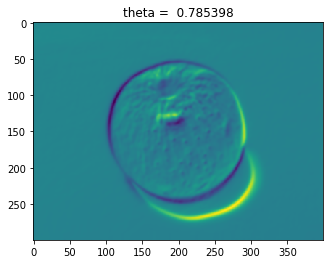

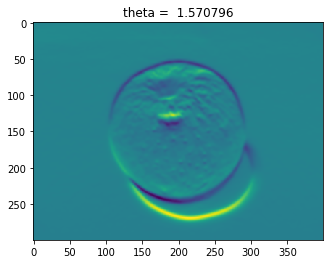

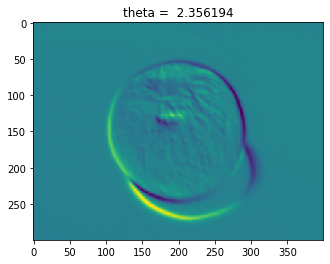

In [5]:
im = imageio.imread('apple.jpg').mean(2)/255.

# Your code here!
Ix = scipy.ndimage.convolve(im, gauss_filter)

Ix1 = scipy.ndimage.convolve(Ix, dx)
Iy1 = scipy.ndimage.convolve(Ix, dy)
theta2 = np.array([math.pi/4, math.pi/2, 3*math.pi/4])

def oriented_grad(Ix,Iy,theta):
  return (math.cos(theta)*Ix + math.sin(theta)*Iy)

for i in theta2:
  plt.figure()
  plt.title('theta =  %f' %i)
  plt.imshow(oriented_grad(Ix1, Iy1, i))
